# Handling Missing Data

real world data:
 - not clean
 - not homogeneous

We'll usually refer to missing data points in general as *null*, *NaN*, or *NA*.

## Missing Data Reperesentation

  - masking approach
  - sentinel approach

In [14]:
import numpy as np
import pandas as pd

In [3]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

Notice that the data type is ``dtype=object``

In [4]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
70.4 ms ± 1.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
2.56 ms ± 39.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



In [5]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [6]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [7]:
1 + np.nan

nan

In [8]:
0 *  np.nan

nan

In [9]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [10]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

### Let's take a look at Pandas

In [11]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [12]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [13]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

## Pandas operators on Null Values

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed

In [13]:
data = pd.Series([1, np.nan, 'hello', None])

In [14]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [15]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [16]:
data.dropna()

0        1
2    hello
dtype: object

In [16]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [17]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [18]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [19]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [20]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [22]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


### How to fill null values in Pandas

In [23]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [24]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [25]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [26]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [27]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [28]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


# PreProcessing using scikit-learn

**Transformation before giving the data to machine learning**
An example is most of the learning algorithms understand  number, so we need to convert text to number.

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


## StandardScaler
<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp4.PNG?raw=true">

In [25]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

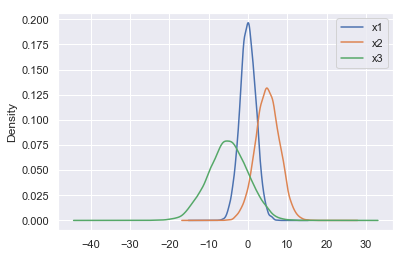

In [28]:
df.plot.kde()

In [29]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

In [30]:
data_tf = standardscaler.fit_transform(df)

In [31]:
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

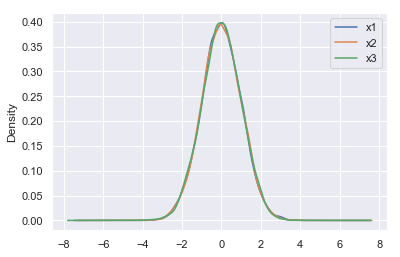

In [32]:
df.plot.kde()

## MinMaxScaler

<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp3.PNG?raw=true">

In [34]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

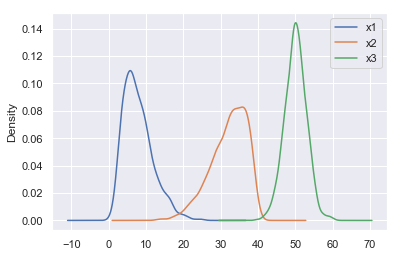

In [35]:
df.plot.kde()

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

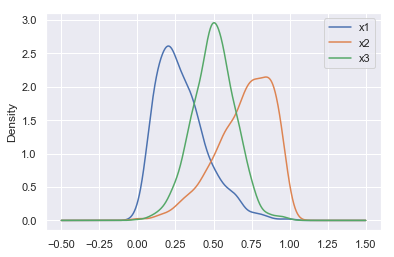

In [38]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

## Robust Scaler
<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp2.PNG?raw=true">

In [40]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

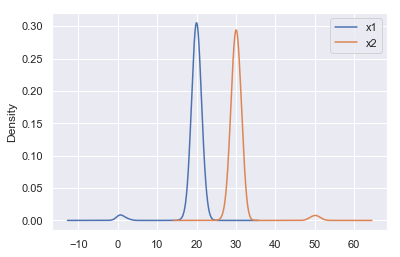

In [41]:
df.plot.kde()

In [42]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

In [43]:
data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])

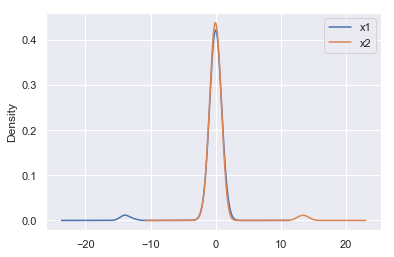

In [44]:
df.plot.kde()

## Normalizer
<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp1.PNG?raw=true">


In [46]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

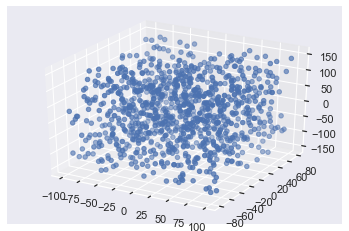

In [47]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

In [48]:
from sklearn.preprocessing import Normalizer

In [49]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)

In [50]:
df = pd.DataFrame(data_tf, columns=['x1','y1','z1'])

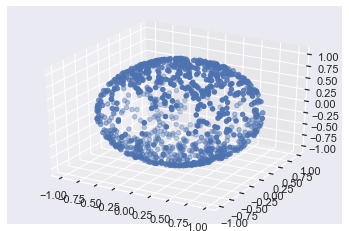

In [51]:
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

## Binarization

In [68]:
X = np.array([[ 1., -1.,  1.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

In [69]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

In [70]:
data_tf = binarizer.fit_transform(X)

In [71]:
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

## Encoding Categorical Values 

#### Encoding Ordinal Values

In [72]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [73]:
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [74]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

#### Encoding Nominal Values

In [76]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Male']})

In [77]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [78]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [79]:
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)

In [80]:
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [83]:
OneHotEncoder(categories='auto').fit_transform(df[['gender_tf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

## Imputation

In [84]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5]
})

In [88]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [89]:
imputer.fit_transform(df)

array([[1. , 3. ],
       [2. , 4. ],
       [3. , 1. ],
       [4. , 3.4],
       [3.4, 4. ],
       [7. , 5. ]])

## Polynomial Features

In [90]:
df = pd.DataFrame({'A':[1,2,3,4,5], 'B':[2,3,4,5,6]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


In [91]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2)

In [92]:
pol.fit_transform(df)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  5.,  6., 25., 30., 36.]])

## Custom Transformer 

In [93]:
from sklearn.preprocessing import FunctionTransformer

In [94]:
def mapping(x):
    x['Age'] = x['Age']+2
    x['Counter'] = x['Counter'] * 2
    return x

In [95]:
customtransformer = FunctionTransformer(mapping, validate=False)

In [96]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Counter':[3,4,2,4,5,2],
     })
df

,Age,Counter
0,33,3
1,44,4
2,22,2
3,44,4
4,55,5
5,22,2


In [97]:
customtransformer.transform(df)

,Age,Counter
0,35,6
1,46,8
2,24,4
3,46,8
4,57,10
5,24,4


## Noise filtering (Outliers)

<img src='https://cdn-images-1.medium.com/max/800/1*TbUF_HTQ6jOhO8EoPnmekQ.jpeg' height=400 width=400>

